In [2]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [35]:
df = pd.read_csv('data/insurance - insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
print(f'There is {df.isna().sum().sum()} missing values in the data set')

There is 0 missing values in the data set


# Q1. Do smokers have higher insurance charges than non-smokers?

## 1. State the Hypothesis and Null Hypothesis

- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non smokers. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference in insurance charges between smoker and non-smokers. 

## 2. Determine the correct test to perform. 

- Numerical Data
- Two groups/samples
- We want to run a 2-sample T-test

In [39]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [40]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [41]:
df['is_smoker']  = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [42]:
need_cols = ['is_smoker', 'charges']
df[needed_cols]

,is_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [43]:
smoker_df = df.loc[df['is_smoker'], needed_cols]
smoker_df

,is_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [ ]:
non_smoker_df = df.loc[~df['is_smoker'], needed_cols]
non_smoker_df

In [124]:
sns.set_palette("mako")

In [117]:
sample = df.sample(n=50,random_state=42)
smoker_charge = sample.loc[sample['smoker'] == 'yes', 'charges'] 
non_smoker_charge = sample.loc[sample['smoker'] == 'no', 'charges'] 

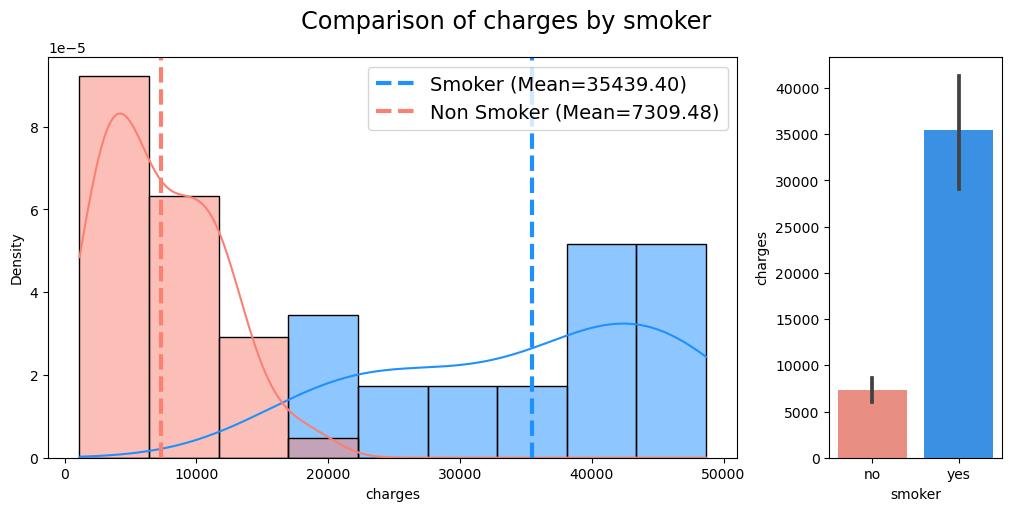

In [132]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charge), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker_charge):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charge ), ls='--', lw=3, 
           label=f"Non Smoker (Mean={np.mean(non_smoker_charge ):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of charges by smoker',fontsize='xx-large');

## 3. Testing Assumptions

In [45]:
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [48]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [49]:
non_smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
non_smoker_outliers.sum()

0

### Test for Normality and Equal Variances

In [50]:
result = stats.normaltest(smoker_group)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [51]:
result = stats.normaltest(non_smoker_group)
result

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [52]:
len(smoker_group)

274

In [53]:
len(non_smoker_group)

1064

In [55]:
result = stats.levene(smoker_group, non_smoker_group)
print(result)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)


In [56]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

## 4. Execute the selected test

In [60]:
alpha = 0.05
result = stats.ttest_ind(non_smoker_group, smoker_group, equal_var = False)
print(result)
result.pvalue < alpha

Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)


True

We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that smoker will have to pay more insurance.

# Q2. Are men more likely to smoke than women?

## 1. State the Hypothesis and Null Hypothesis

- $H_0$ (Null Hypothesis): There is no difference between women and men in term of smoking. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference in smoking between men and women. 

## 2. Determine the correct test to perform.

- Categorical
- 2 groups of data
- Chi square test will be chosen

## 3. Testing Assumptions

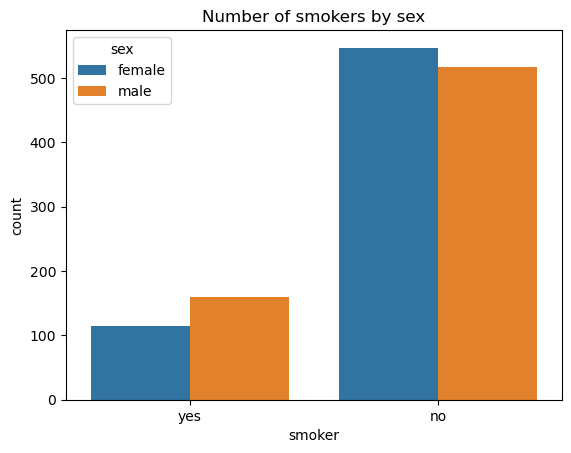

In [62]:
ax = sns.countplot(data = df, x ='smoker', hue ='sex')
ax.set_title('Number of smokers by sex');

## 4. Execute the selected test

In [63]:
#getting the contingenc table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [65]:
result = stats.chi2_contingency(table)
chi2, p, deg_free,  expected_vals = result

In [67]:
print(p)
p < alpha

0.006548143503580696


True

-  so our p < alpha we reject the null hypothesis
--> we accept the alternate hypothesis, there is a fact that men are most likely smoking than women. 

#  Q3. Do different regions have different charges, on average?

## 1. State the Hypothesis and Null Hypothesis

- $H_0$ (Null Hypothesis): There is no difference in avg. charges between regions  
- $H_A$ (Alternative Hypothesis):  There is a significant difference in avg. charges between regions.

## 2. Determine the correct test to perform.

-  Numerical
- More than 2 samples
- ANOVA test will be chosen

In [68]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Visualize and separate data for hypothesis 

In [71]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

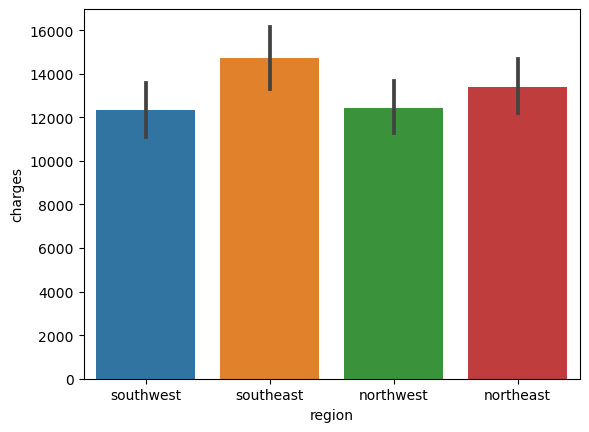

In [69]:
ax = sns.barplot (data = df, x ='region', y = 'charges' )

In [74]:
needed_cols = ['region', 'charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [77]:
groups ={}
for region in df['region'].unique():
    temp = df.loc[df['region']== region, 'charges']
    groups[region] = temp
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## 3. Testing assumptions

In [88]:
for region, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


In [89]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [90]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


- We failed the normality test, but our groups is large enough to ignore this result

In [94]:
result = stats.levene(*groups.values())
result

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [95]:
if result.pvalue < alpha:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


## 4. Final Hypothesis test

Our data is failed both the test for normality and equal variance.
- so we have to choose a non-parametric tests, in this case is the Kruskal-Wallis test.

In [98]:
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

- our Kruskal Wallis test return a p-value greater than alpha so we fail to reject the null hypothesis , There is no significant difference between the avg. insurance charges between region